In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Importing necessary libraries for model training and evaluation
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [3]:
# Load the data
file_path = 'creditcard_2023.csv'
data = pd.read_csv(file_path)

# Drop the 'id' column
data = data.drop(columns=['id'])

# Remove duplicate rows
data = data.drop_duplicates()

# Standardize the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Display basic info of the preprocessed data
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 568629 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568629 non-null  float64
 1   V2      568629 non-null  float64
 2   V3      568629 non-null  float64
 3   V4      568629 non-null  float64
 4   V5      568629 non-null  float64
 5   V6      568629 non-null  float64
 6   V7      568629 non-null  float64
 7   V8      568629 non-null  float64
 8   V9      568629 non-null  float64
 9   V10     568629 non-null  float64
 10  V11     568629 non-null  float64
 11  V12     568629 non-null  float64
 12  V13     568629 non-null  float64
 13  V14     568629 non-null  float64
 14  V15     568629 non-null  float64
 15  V16     568629 non-null  float64
 16  V17     568629 non-null  float64
 17  V18     568629 non-null  float64
 18  V19     568629 non-null  float64
 19  V20     568629 non-null  float64
 20  V21     568629 non-null  float64
 21  V22     568629 

Accuracy: 0.9188400189930183
Precision: 0.9751800642445282
Recall: 0.8595571812953942
F1-Score: 0.9137254168847678
ROC AUC: 0.9747276963674155
Confusion Matrix: 
[[55619  1244]
 [ 7986 48877]]
Confusion Matrix: 
[[55619  1244]
 [ 7986 48877]]


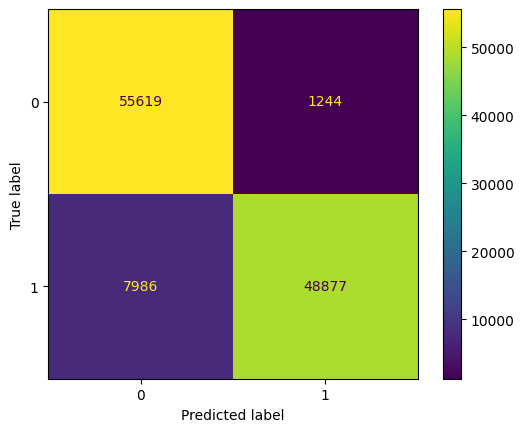

In [3]:
# Split the data into features and target
x_data = data.drop(columns=['Class'])
y_data = data['Class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y)

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)
y_pred_proba = gnb.predict_proba(X_test)[:, 1]  # probabilities for the positive outcome is kept

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the performance metrics
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1-Score: {}'.format(f1))
print('ROC AUC: {}'.format(roc_auc))
print('Confusion Matrix: \n{}'.format(conf_matrix))
print(f"Confusion Matrix: \n{conf_matrix}")
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()


# Now, you can compare these metrics with those from your logistic regression model.
